In [12]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.io as scio
from scipy import stats
import numpy as np
import os 

## Load data 

In [2]:
data_files = pd.read_csv('..\\Task_track_files\\task_track_file_v3.csv')
data_files


,Unnamed: 0,local_file_path,raw_data_file_name,preprocessed_one,ICA_name,IC_Feature,R_squareds_BF,R_squareds_BF_permutation,R_squareds_three_state,R_squareds_three_state_permutation,R_squareds_KL,R_squareds_KL_permutation,Group_file_type
0,0,sub-003\ses-01\eeg\,sub-003_ses-01_task-Rest_eeg.set,pre_sub-003_ses-01_task-Rest_eeg.set,ICA_pre_sub-003_ses-01_task-Rest_eeg.set,IC_Feature_sub-003_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-003_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-003_ses-01_ta...,R_squareds_three_state_v3_sub-003_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-003_...,R_squareds_KL_v3_sub-003_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-003_ses-01_ta...,CTL
1,1,sub-005\ses-01\eeg\,sub-005_ses-01_task-Rest_eeg.set,pre_sub-005_ses-01_task-Rest_eeg.set,ICA_pre_sub-005_ses-01_task-Rest_eeg.set,IC_Feature_sub-005_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-005_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-005_ses-01_ta...,R_squareds_three_state_v3_sub-005_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-005_...,R_squareds_KL_v3_sub-005_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-005_ses-01_ta...,CTL
2,2,sub-028\ses-01\eeg\,sub-028_ses-01_task-Rest_eeg.set,pre_sub-028_ses-01_task-Rest_eeg.set,ICA_pre_sub-028_ses-01_task-Rest_eeg.set,IC_Feature_sub-028_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-028_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-028_ses-01_ta...,R_squareds_three_state_v3_sub-028_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-028_...,R_squareds_KL_v3_sub-028_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-028_ses-01_ta...,CTL
3,3,sub-029\ses-01\eeg\,sub-029_ses-01_task-Rest_eeg.set,pre_sub-029_ses-01_task-Rest_eeg.set,ICA_pre_sub-029_ses-01_task-Rest_eeg.set,IC_Feature_sub-029_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-029_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-029_ses-01_ta...,R_squareds_three_state_v3_sub-029_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-029_...,R_squareds_KL_v3_sub-029_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-029_ses-01_ta...,CTL
4,4,sub-030\ses-01\eeg\,sub-030_ses-01_task-Rest_eeg.set,pre_sub-030_ses-01_task-Rest_eeg.set,ICA_pre_sub-030_ses-01_task-Rest_eeg.set,IC_Feature_sub-030_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-030_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-030_ses-01_ta...,R_squareds_three_state_v3_sub-030_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-030_...,R_squareds_KL_v3_sub-030_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-030_ses-01_ta...,CTL
5,5,sub-031\ses-01\eeg\,sub-031_ses-01_task-Rest_eeg.set,pre_sub-031_ses-01_task-Rest_eeg.set,ICA_pre_sub-031_ses-01_task-Rest_eeg.set,IC_Feature_sub-031_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-031_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-031_ses-01_ta...,R_squareds_three_state_v3_sub-031_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-031_...,R_squareds_KL_v3_sub-031_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-031_ses-01_ta...,CTL
6,6,sub-032\ses-01\eeg\,sub-032_ses-01_task-Rest_eeg.set,pre_sub-032_ses-01_task-Rest_eeg.set,ICA_pre_sub-032_ses-01_task-Rest_eeg.set,IC_Feature_sub-032_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-032_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-032_ses-01_ta...,R_squareds_three_state_v3_sub-032_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-032_...,R_squareds_KL_v3_sub-032_ses-01_task-Rest_eeg.mat,R_squareds_KL_permutation_v3_sub-032_ses-01_ta...,CTL
7,7,sub-033\ses-01\eeg\,sub-033_ses-01_task-Rest_eeg.set,pre_sub-033_ses-01_task-Rest_eeg.set,ICA_pre_sub-033_ses-01_task-Rest_eeg.set,IC_Feature_sub-033_ses-01_task-Rest_eeg.mat,R_squareds_BF_v3_sub-033_ses-01_task-Rest_eeg.mat,R_squareds_permutation_BF_v3_sub-033_ses-01_ta...,R_squareds_three_state_v3_sub-033_ses-01_task-...,R_squareds_three_state_permutation_v3_sub-033_...,R_

In [3]:
def split(s):
    return s.split('.')[0]
IC_feature = list(map(split,data_files['IC_Feature'][:]))

IC_feature = np.squeeze(pd.DataFrame(IC_feature).to_numpy())
# data_files['R_squareds_BF'].to_numpy()

In [4]:
path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball\EEG_feature\IC_collected_trials\EEGlab_pre_process_'
R_BF = np.zeros([25,2])
R_Three_State = np.zeros([25,2])
R_KL = np.zeros([25,2])

R_BF_Files_Path_without_per = path + '\\' + IC_feature + '\\' + data_files['R_squareds_BF'].to_numpy()
R_BF_Files_Path_with_per = path + '\\' + IC_feature + '\\' + data_files['R_squareds_BF_permutation'].to_numpy()

R_Three_State_Files_Path_without_per = path + '\\' + IC_feature + '\\' + data_files['R_squareds_three_state'].to_numpy()
R_Three_State_Files_Path_with_per = path + '\\' + IC_feature + '\\' + data_files['R_squareds_three_state_permutation'].to_numpy()

R_KL_Files_Path_without_per = path + '\\' + IC_feature + '\\' + data_files['R_squareds_KL'].to_numpy()
R_KL_Files_Path_with_per = path + '\\' + IC_feature + '\\' + data_files['R_squareds_KL_permutation'].to_numpy()



In [13]:
a = scio.loadmat(R_Three_State_Files_Path_with_per[0][:-4] + '_range_w5_20.mat')

# 'R_squareds_three_state_permutation_v3_sub-003_ses-01_task-Rest_eeg_range_w5_20'

In [5]:
for i in np.arange(25):
    a = scio.loadmat(R_KL_Files_Path_without_per[i][:-4] + '_range_w_1_100.mat')
    b = scio.loadmat(R_KL_Files_Path_with_per[i][:-4] + '_range_w_1_100.mat')
    R_KL[i,0] = a['Variable_name'][0][1]
    R_KL[i,1] = b['Variable_name'][0][1]

    a = scio.loadmat(R_Three_State_Files_Path_without_per[i] + '_range_5_20.mat')
    b = scio.loadmat(R_Three_State_Files_Path_with_per[i][:-4] + '_range_w5_20.mat')
    R_Three_State[i,0] = a['Variable_name'][0][1]
    R_Three_State[i,1] = b['Variable_name'][0][1]

    a = scio.loadmat(R_BF_Files_Path_without_per[i])
    b = scio.loadmat(R_BF_Files_Path_with_per[i])
    R_BF[i,0] = a['Variable_name'][0][1]
    R_BF[i,1] = b['Variable_name'][0][1]

# R_squareds_three_state_v3_sub-003_ses-01_task-Rest_eeg.mat
# os.path.isfile(R_KL_Files_Path_without_per[0][:-4] + '_range_w_1_100.mat')
# os.path.isfile('D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\EEG_feature\\IC_collected_trials\\EEGlab_pre_process_\\IC_Feature_sub-003_ses-01_task-Rest_eeg\\R_squareds_KL_v3_sub-003_ses-01_task-Rest_eeg_range_w_1_100.mat')

In [28]:
print(np.mean(R_KL[:,0]))
print(np.mean(R_BF[:,0]))
print(np.std(R_KL[:,0]))
print(np.std(R_BF[:,0]))
t, p = scipy.stats.ttest_ind(R_BF[:,0],R_KL[:,0],equal_var=True,alternative='greater')
print(p)
print(t)

0.10815992832183838
0.13456028461456299
0.06366372774275658
0.06704925126881656
0.08414571780674557
1.3988336580415857


In [39]:
def format_func_x(value, tick_number):
    # find number of multiples of pi/2
    if tick_number == 0:
        return 'without permutation'
    else:
        return 'with permutation'    

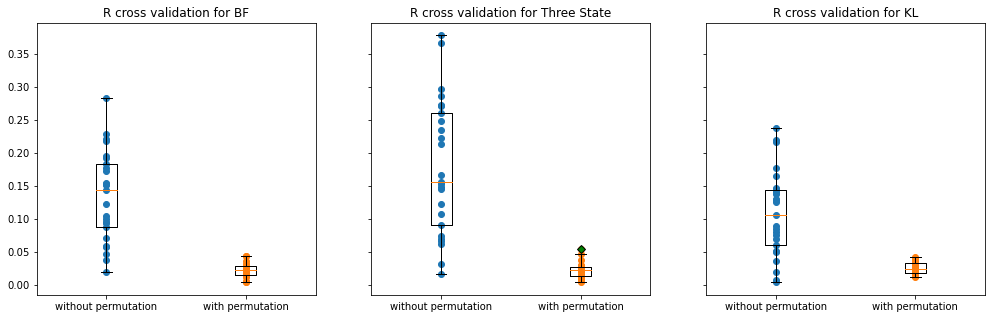

In [40]:
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots(1,3,figsize=(17,5),sharey=True)
ax3[0].set_title('R cross validation for BF')
ax3[0].boxplot(R_BF, flierprops=green_diamond)
ax3[0].scatter(np.ones([25,]),R_BF[:,0],)
ax3[0].scatter(2*np.ones([25,]),R_BF[:,1])
ax3[0].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
ax3[1].set_title('R cross validation for Three State')
ax3[1].boxplot(R_Three_State, flierprops=green_diamond)
ax3[1].scatter(np.ones([25,]),R_Three_State[:,0],)
ax3[1].scatter(2*np.ones([25,]),R_Three_State[:,1])
ax3[1].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
ax3[2].set_title('R cross validation for KL')
ax3[2].boxplot(R_KL, flierprops=green_diamond)
ax3[2].scatter(np.ones([25,]),R_KL[:,0],)
ax3[2].scatter(2*np.ones([25,]),R_KL[:,1])
ax3[2].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))

In [57]:
def split(s):
    return s.split('.')[0]
IC_feature = list(map(split,data_files['IC_Feature'][:]))    

['IC_Feature_sub-003_ses-01_task-Rest_eeg',
 'IC_Feature_sub-005_ses-01_task-Rest_eeg',
 'IC_Feature_sub-028_ses-01_task-Rest_eeg',
 'IC_Feature_sub-029_ses-01_task-Rest_eeg',
 'IC_Feature_sub-030_ses-01_task-Rest_eeg',
 'IC_Feature_sub-031_ses-01_task-Rest_eeg',
 'IC_Feature_sub-032_ses-01_task-Rest_eeg',
 'IC_Feature_sub-033_ses-01_task-Rest_eeg',
 'IC_Feature_sub-034_ses-01_task-Rest_eeg',
 'IC_Feature_sub-035_ses-01_task-Rest_eeg',
 'IC_Feature_sub-036_ses-01_task-Rest_eeg',
 'IC_Feature_sub-037_ses-01_task-Rest_eeg',
 'IC_Feature_sub-038_ses-01_task-Rest_eeg',
 'IC_Feature_sub-039_ses-01_task-Rest_eeg',
 'IC_Feature_sub-040_ses-01_task-Rest_eeg',
 'IC_Feature_sub-041_ses-01_task-Rest_eeg',
 'IC_Feature_sub-042_ses-01_task-Rest_eeg',
 'IC_Feature_sub-043_ses-01_task-Rest_eeg',
 'IC_Feature_sub-044_ses-01_task-Rest_eeg',
 'IC_Feature_sub-045_ses-01_task-Rest_eeg',
 'IC_Feature_sub-046_ses-01_task-Rest_eeg',
 'IC_Feature_sub-047_ses-01_task-Rest_eeg',
 'IC_Feature_sub-048_ses-01_task